Deteccion de incendios

In [1]:
%%capture

# Librería para mostrar la barra de progreso en la extracción del zip
!pip install tqdm

Instalamos algunas de las librerías que necesitaremos.

In [2]:
import os
from random import randint
import cv2                      # OpenCV
import numpy as np              # Numpy
import keras                    # Keras
from keras import layers
import matplotlib.pyplot as plt # Matplotlib

In [3]:
from tqdm import tqdm

In [4]:
from google.colab import files

In [5]:
%%capture
!pip install -q kaggle

Subimos la api de kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielrodrguezabal","key":"c3ef188bdfb36c8c12157385f677f089"}'}

Descargamos los ficheros de kaggle con sus correspondientes token

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d kutaykutlu/forest-fire

100% 2.46G/2.46G [00:30<00:00, 107MB/s]
100% 2.46G/2.46G [00:30<00:00, 86.7MB/s]
 99% 381M/385M [00:03<00:00, 158MB/s]
100% 385M/385M [00:03<00:00, 115MB/s]
 99% 385M/387M [00:04<00:00, 108MB/s] 
100% 387M/387M [00:04<00:00, 86.1MB/s]


Ahora pasamos a descomprimir los ficheros.

In [8]:
# Descomprimir el zip descargado

import zipfile

with zipfile.ZipFile("forest-fire-images.zip", 'r') as zip:
  for member in tqdm(zip.infolist(), desc='Extrayendo '):
    try:
      zip.extract(member)
    except zipfile.error as e:
      pass

  print('Los dataset han sido descomprimidos correctamente 🎉')

# Borrar el zip para liberar ese espacio de almacenamiento

!rm forest-fire-images.zip


Extrayendo : 100%|██████████| 15765/15765 [00:38<00:00, 409.59it/s] 


Los dataset han sido descomprimidos correctamente 🎉
rm: cannot remove 'fire-dataset.zip': No such file or directory


Como hicimos en el ejercicio, vamos diseñar una función que nos muestre las imágenes aleatoriamente.

In [37]:
def show_image():
  folders = ['/content/test_big', '/content/test_small', '/content/train-smoke', '/content/train_fire', '/content/Data']
  i = randint(0, 3)
  folder = folders[i]
  title = os.listdir(folder)[randint(0,len(os.listdir(folder)) -1)]
  file = folder + '/' + title

  fig, ax = plt.subplots(figsize=(7, 7))
  picture = cv2.imread(file)
  picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
  ax.imshow(picture)
  ax.axis('off')
  ax.set_title(folder + ' ' + title)

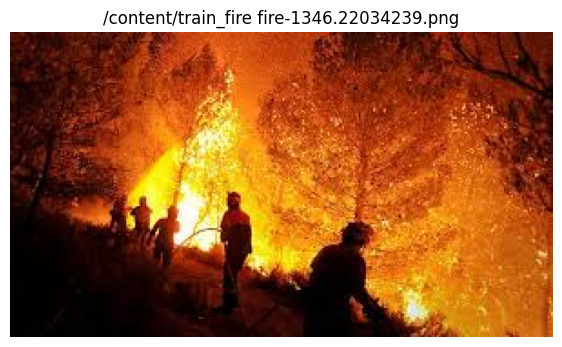

In [46]:
show_image()